## 6장-2절. hierarchical clustering(계층적 군집분석)
- 유클리드 거리를 이용한 군집분석 방법
- 덴드로그램
    - 표본들이 군을 형성하는 과정을 나타내는 나무 형식의 그림
    - 3차원 이상의 군집에서도 dendogram을 통해 직관적인 cluster 형성이 가능하다는 장점이 있다.
- 군집화 방식(하이퍼파라미터 method)
    - Single : 최단 연결법, 두 군집에 있는 모든 데이터 조합에서 데이터 사이 거리를 측정해서 가장 최소 거리(작은 값)를 기준으로 군집 거리를 측정
    - Complete : 최장 연결법으로 두 클러스터상에서 가장 먼 거리를 이용해서 측정하는 방식
    - Average : 평균 연결법, 두 군집의 데이터들 간 모든 거리들의 평균을 군집간 거리로 정의 
    - Centroid : 두 군집의 중심점(centroid)를 정의한 다음 두 중심점의 거리를 군집간의 거리로 측정
    - Ward : 연결될 수 있는 군집 조합을 만들고, 군집 내 편차들의 제곱합을 기준으로 (군집의 평균과 데이터들 사이의 오차 제곱합(SSE)을 측정해) 최소 제곱합을 가지게 되는 군집끼리 연결


In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
customer_data = pd.read_csv('./data/shopping-data.csv')
customer_data.head()
customer_data.shape

(200, 5)

In [24]:
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
data = customer_data.iloc[:,3:5].values

---
---

## dendrogram 시각화 : 군집수 결정
- 하이퍼파라미터
    - method
        - single
        - complete
        - average
        - ward
        - centroid
    - leaf_rotation : 글자 각도
    - leaf_font_size : 글자 사이즈 

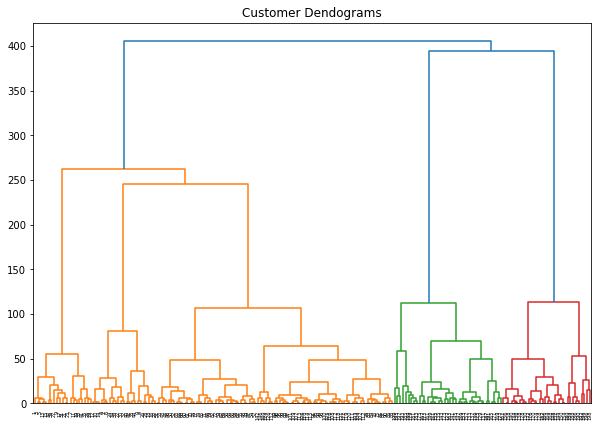

In [10]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10,7))
plt.title('Customer Dendograms')
dend = shc.dendrogram(shc.linkage(data, method='ward'))

#### 해석
- 나누는 기준에 따라 군집을 몇개로 할지 정하면 된다.
    - 색으로 나누면 3개로 나눌 수 있다.
    - 또는 그 바로 아래 기준으로 5개로 나눌 수 있다.

---
---

## 클러스터링
- 하이퍼파라미터
    - n_clusters
    - affinity
    - linkage

In [14]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='ward')
cluster.fit_predict(data)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int64)

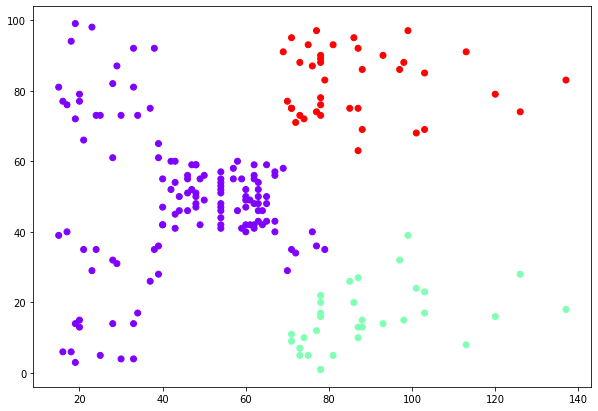

In [15]:
plt.figure(figsize=(10,7))
plt.scatter(data[:,0],data[:,1], c=cluster.labels_, cmap='rainbow')

In [16]:
from sklearn.cluster import AgglomerativeClustering

cluster2 = AgglomerativeClustering(n_clusters=5, affinity='euclidean',linkage='ward')
cluster2.fit_predict(data)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

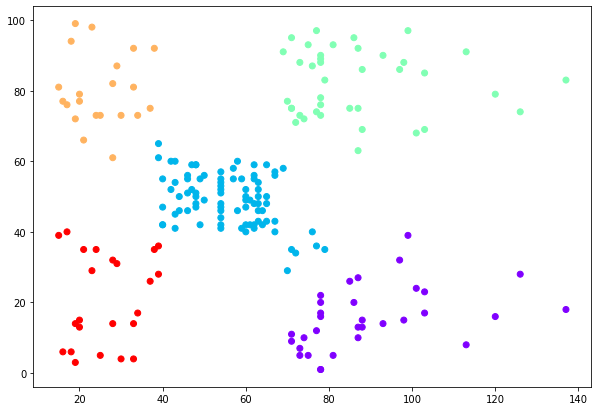

In [18]:
plt.figure(figsize=(10,7))
plt.scatter(data[:,0],data[:,1], c=cluster2.labels_, cmap='rainbow')

---
---

##  실루엣 평가

In [21]:
from sklearn.metrics import silhouette_samples, silhouette_score

print(silhouette_score(data,cluster.labels_))
print(silhouette_score(data,cluster2.labels_))

0.4618340266628975
0.5529945955148897


In [ ]:
customer_data['label'] = cluster2.labels_

In [58]:
s_coefs = silhouette_samples(data,cluster2.labels_)
customer_data['silhouette'] = s_coefs
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),label,silhouette
0,1,Male,19,15,39,4,0.424758
1,2,Male,21,15,81,3,0.712697
2,3,Female,20,16,6,4,0.641527
3,4,Female,23,16,77,3,0.711892
4,5,Female,31,17,40,4,0.400968


In [59]:
customer_data.groupby('label')['silhouette'].mean()

label
0    0.550905
1    0.561361
2    0.512301
3    0.636188
4    0.518023
Name: silhouette, dtype: float64

---
---

## 클러스터링 활용 분석

In [61]:
customer_data.groupby('label').count()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),silhouette
label,,,,,,
0,32,32,32,32,32,32
1,85,85,85,85,85,85
2,39,39,39,39,39,39
3,21,21,21,21,21,21
4,23,23,23,23,23,23


In [57]:
grouped = customer_data.groupby('label')

group_1 = grouped.get_group(1)
group_1.count()
group_1.mean()

CustomerID                87.894118
Age                       42.482353
Annual Income (k$)        55.811765
Spending Score (1-100)    49.129412
label                      1.000000
dtype: float64

In [50]:
customer_data.loc[customer_data['label']==1].describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),label
count,85.000000,85.000000,85.000000,85.000000,85.0
mean,87.894118,42.482353,55.811765,49.129412,1.0
std,26.542878,16.395856,9.731508,7.281399,0.0
min,44.000000,18.000000,39.000000,29.000000,1.0
25%,66.000000,27.000000,48.000000,43.000000,1.0
50%,87.000000,46.000000,57.000000,49.000000,1.0
75%,108.000000,54.000000,63.000000,55.000000,1.0
max,161.000000,70.000000,79.000000,65.000000,1.0


---
---

## 보스턴데이터 실습

In [78]:
boston = pd.read_csv('./data/Boston_house.csv')
boston.head()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2


In [79]:
data = boston.drop(['Target'],axis=1)
target = boston['Target']

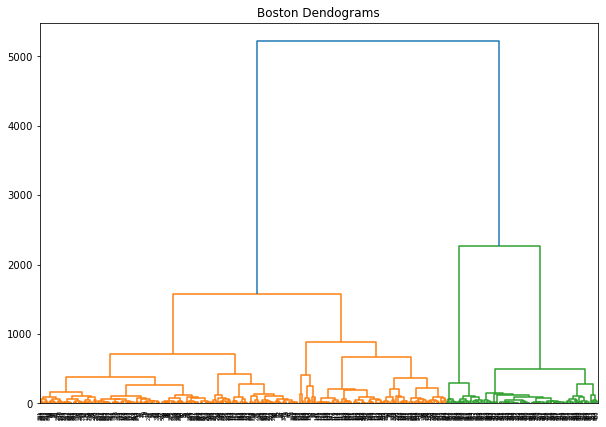

In [80]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10,7))
plt.title('Boston Dendograms')
dend = shc.dendrogram(shc.linkage(data, method='ward'))

#### 해석
- 2개의 군집으로 나누는게 적당해 보인다.

In [81]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [83]:
data['label'] = cluster.labels_

In [84]:
data.loc[data['label']==0].describe()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,label
count,137.000000,137.000000,137.000000,137.000000,137.00000,137.000000,137.000000,137.000000,137.000000,137.000000,137.0,137.000000,137.000000,137.0
mean,89.967883,291.039051,6.006212,12.299162,2.05447,18.451825,18.674526,0.670102,20.196350,23.270073,0.0,667.642336,0.058394,0.0
std,12.469840,144.089867,0.713021,13.017296,0.60790,1.814342,6.873577,0.061051,0.018821,3.764196,0.0,8.469441,0.235348,0.0
min,40.300000,0.320000,3.561000,0.105740,1.12960,18.100000,2.960000,0.532000,20.100000,4.000000,0.0,666.000000,0.000000,0.0
25%,86.100000,210.970000,5.683000,5.441140,1.58950,18.100000,14.190000,0.614000,20.200000,24.000000,0.0,666.000000,0.000000,0.0
50%,94.500000,374.560000,6.152000,8.716750,1.92650,18.100000,18.050000,0.693000,20.200000,24.000000,0.0,666.000000,0.000000,0.0
75%,98.800000,395.280000,6.411000,14.236200,2.36820,18.100000,23.240000,0.713000,20.200000,24.000000,0.0,666.000000,0.000000,0.0
max,100.000000,396.900000,8.780000,88.976200,4.09830,27.740000,37.970000,0.770000,20.200000,24.000000,0.0,711.000000,1.000000,0.0


In [85]:
data.loc[data['label']==1].describe()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,label
count,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.0
mean,60.632249,381.042575,6.388005,0.388774,4.441272,8.420894,10.417453,0.511847,17.809214,4.455285,15.582656,311.926829,0.073171,1.0
std,28.217681,39.567014,0.670817,0.628724,2.097985,6.004356,5.831720,0.101241,2.210135,1.643095,26.086641,67.828288,0.260770,0.0
min,2.900000,70.800000,4.903000,0.006320,1.321600,0.460000,1.730000,0.385000,12.600000,1.000000,0.000000,187.000000,0.000000,1.0
25%,35.900000,383.780000,5.933000,0.057890,2.714700,4.000000,6.120000,0.437000,16.400000,4.000000,0.000000,270.000000,0.000000,1.0
50%,62.200000,392.780000,6.245000,0.131580,4.052200,6.410000,9.380000,0.493000,17.900000,4.000000,0.000000,304.000000,0.000000,1.0
75%,88.000000,396.330000,6.727000,0.369200,5.873600,10.010000,13.280000,0.544000,19.200000,5.000000,22.000000,384.000000,0.000000,1.0
max,100.000000,396.900000,8.725000,4.097400,12.126500,25.650000,34.410000,0.871000,22.000000,8.000000,100.000000,469.000000,1.000000,1.0
